In [10]:
#导包
import torch
import matplotlib.pyplot as plt

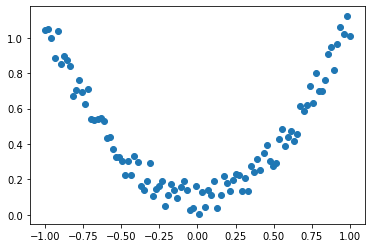

In [11]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #将一维数据转换成二维数据，因为神经网络中只能对二维数据进行操作
y = x.pow(2) + 0.2* torch.rand(x.size()) #  x.pow(x)意为x^2 ; 0.2* torch.rand(x.size())目的是为了给数据添加噪声
# a = torch.rand(x.size())
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

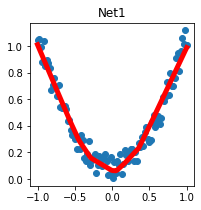

In [12]:
#创建神经网络模型
net1 = torch.nn.Sequential(
        torch.nn.Linear(1,20),
        torch.nn.ReLU(),
        torch.nn.Linear(20,1)
    )
# 创建优化器和损失函数
optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()
# 训练
for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [13]:
# 保存模型（两种方法）
def save():
    torch.save(net1,"net1.pkl") #直接保存
    torch.save(net1.state_dict(),"net1_params.pkl") #只保存网络结构参数
save()

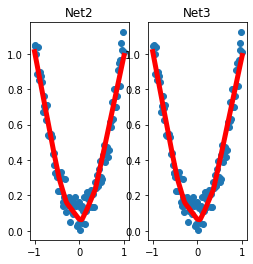

In [17]:
#提取神经网络（两种方法）
# 全部提取
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net1.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
restore_net()

# 只提取参数
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net1_params.pkl'))
    prediction = net3(x)
    """
    再使用load_state_dice方法时，只保存训练好的权重,把加载好的权重复制到模型的权重中
    注意，需要提前构建网络 
    """

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()
restore_params()